In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Crop-Disease/crop_disese_detection.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
0,36,140,146,148,149,140,140,141,144,142,...,116,116,119,117,111,119,122,110,126,126
1,36,150,151,150,149,149,154,148,149,146,...,108,108,107,103,108,108,96,113,91,99
2,36,151,149,155,149,150,157,156,160,155,...,115,125,139,130,138,141,133,141,134,121
3,36,144,144,148,140,146,147,142,141,152,...,103,100,92,95,92,98,89,85,81,91
4,36,137,140,134,138,140,135,140,137,129,...,95,90,96,86,91,89,86,91,91,94


In [ ]:
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols)

In [ ]:
X = np.array(data.iloc[:, 1:])
y = to_categorical(np.array(data.iloc[:, 0]))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_val /= 255

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM, Bidirectional, Conv1D, concatenate, Permute, Dropout

In [ ]:
batch_size = 32
num_classes = 39
epochs = 100

In [ ]:
row_hidden = 64
col_hidden = 64

In [ ]:
row, col = X_train.shape[1:]

In [ ]:
input = Input(shape=(row, col))

In [ ]:
def lstm_pipe(in_layer):
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(x)
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences = True))(x)
    return LSTM(col_hidden)(encoded_rows)

In [ ]:
# read it by rows
first_read = lstm_pipe(input)

In [ ]:
# read it by columns
trans_read = lstm_pipe(Permute(dims = (1,2))(input))

In [ ]:
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(input, prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64)]     0           []                               
                                                                                                  
 permute (Permute)              (None, 64, 64)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 64, 64)       12352       ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 64, 64)       12352       ['permute[0][0]']                
                                                                                              

In [ ]:
from tensorflow.keras.utils import plot_model

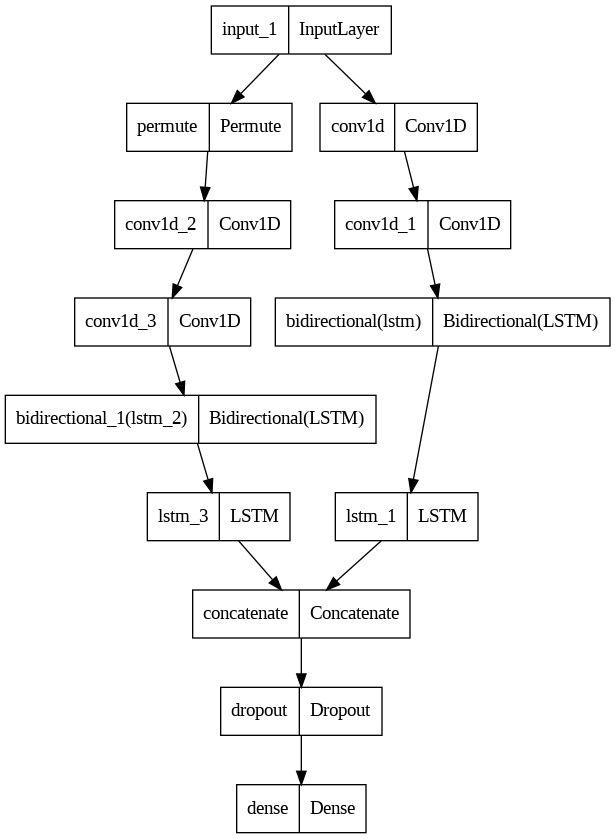

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/100
1387/1387 [==============================] - 58s 26ms/step - loss: 2.7336 - accuracy: 0.2585 - val_loss: 2.2583 - val_accuracy: 0.3624
Epoch 2/100
1387/1387 [==============================] - 31s 22ms/step - loss: 2.1208 - accuracy: 0.3940 - val_loss: 1.9278 - val_accuracy: 0.4463
Epoch 3/100
1387/1387 [==============================] - 31s 22ms/step - loss: 1.8454 - accuracy: 0.4691 - val_loss: 1.6977 - val_accuracy: 0.5049
Epoch 4/100
1387/1387 [==============================] - 32s 23ms/step - loss: 1.6601 - accuracy: 0.5147 - val_loss: 1.5167 - val_accuracy: 0.5489
Epoch 5/100
1387/1387 [==============================] - 33s 24ms/step - loss: 1.4957 - accuracy: 0.5566 - val_loss: 1.3747 - val_accuracy: 0.5873
Epoch 6/100
1387/1387 [==============================] - 31s 23ms/step - loss: 1.3567 - accuracy: 0.5961 - val_loss: 1.2537 - val_accuracy: 0.6231
Epoch 7/100
1387/1387 [==============================] - 32s 23ms/step - loss: 1.2487 - accuracy: 0.6246 - val_loss: 1

In [ ]:
model.save('LSTMModel9376.h5')

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([[2.89992685e-03, 1.21695351e-07, 4.25104190e-05, ...,
        2.65658662e-10, 1.12701283e-14, 7.56360241e-16],
       [9.55628771e-11, 7.27839247e-11, 1.96421506e-13, ...,
        6.09513440e-10, 1.30327476e-11, 5.17600753e-08],
       [1.05238054e-04, 6.68487610e-06, 2.64792107e-02, ...,
        4.94063832e-03, 1.02015061e-03, 5.42925420e-08],
       ...,
       [2.79496419e-07, 3.64520041e-08, 9.07231512e-11, ...,
        5.86821214e-09, 1.00519482e-10, 1.19490511e-11],
       [2.29963759e-09, 4.99207111e-08, 1.73453975e-06, ...,
        3.58641938e-09, 8.17977864e-16, 4.63463816e-11],
       [4.82386397e-09, 2.22414371e-07, 1.69111086e-10, ...,
        2.26443907e-12, 3.91351451e-10, 5.67190905e-10]], dtype=float32)

In [ ]:
# y_prob = model.predict(X_val)
# y_pred = np.argmax(y_prob, axis=1)
# report = classification_report(y_val, y_pred, output_dict=True)

y_pred = model.predict(X_val)
report = classification_report(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1), output_dict=True)


347/347 [==============================] - 4s 10ms/step


In [ ]:
# create a dataframe from the classification report
df = pd.DataFrame(report).transpose()

In [ ]:
df.tail()

,precision,recall,f1-score,support
37,0.610390,0.643836,0.626667,73.000000
38,0.851124,0.920973,0.884672,329.000000
accuracy,0.765645,0.765645,0.765645,0.765645
macro avg,0.708541,0.708176,0.706700,11090.000000
weighted avg,0.766245,0.765645,0.765024,11090.000000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')

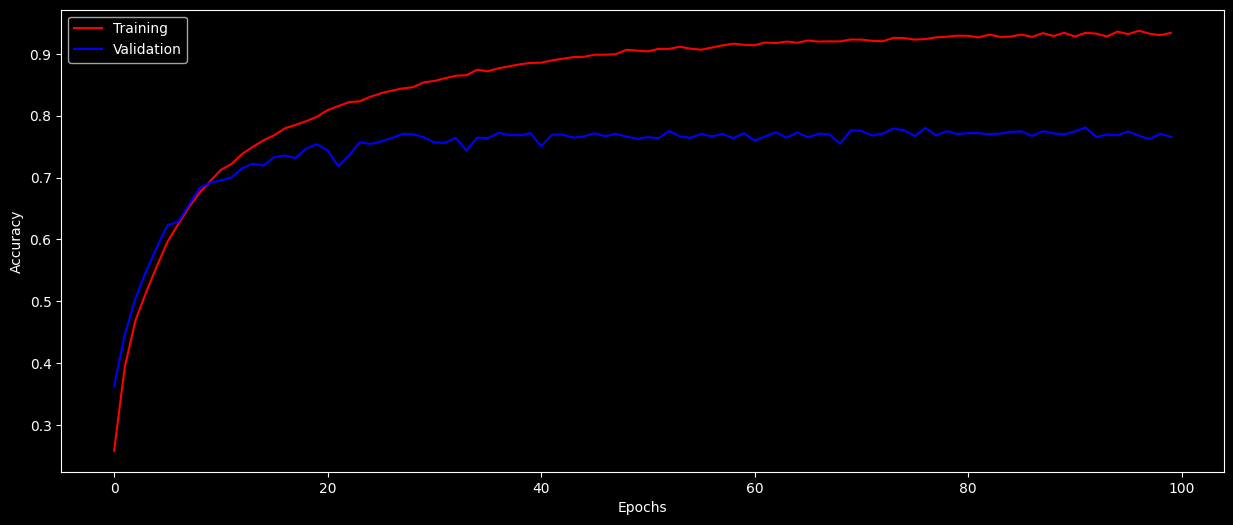

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(15,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

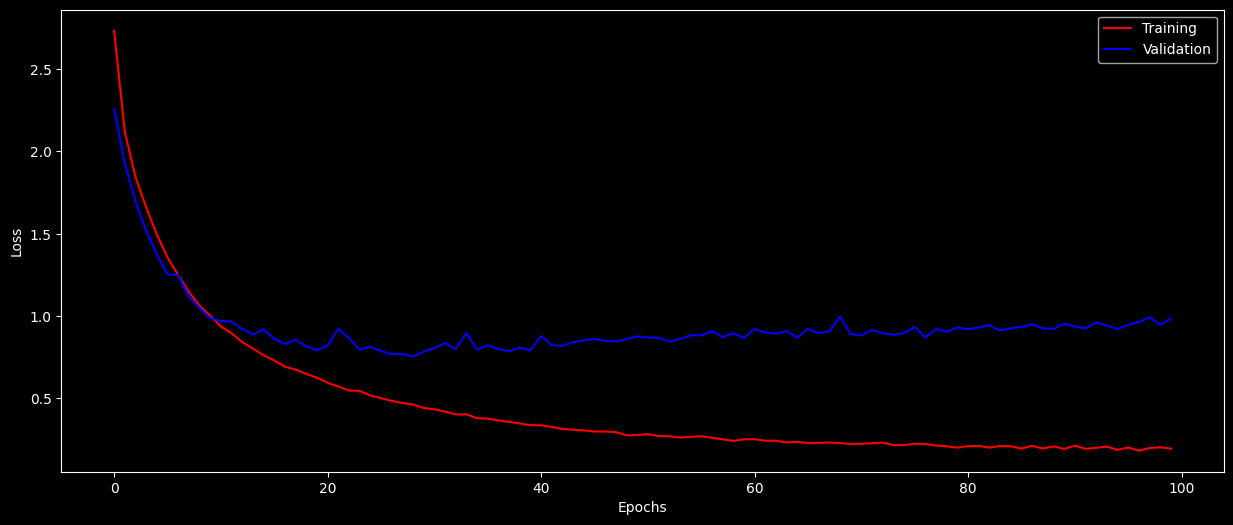

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(15,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()